In [2]:
import numpy as np
import pyart
import matplotlib.pyplot as plt
import os
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
import glob

In [3]:
import glob

# Define the path to the folder and the pattern of the files
folder_path = 'C:/Users/omitu/Desktop/KHGX/KHGX*'

# Create a list of file paths
filenames = glob.glob(folder_path)

# Now filenames will contain the list of file paths matching the pattern


In [21]:
filenames

['C:/Users/omitu/Desktop/KHGX\\KHGX20220820_190340_V06',
 'C:/Users/omitu/Desktop/KHGX\\KHGX20220820_191055_V06',
 'C:/Users/omitu/Desktop/KHGX\\KHGX20220820_191810_V06',
 'C:/Users/omitu/Desktop/KHGX\\KHGX20220820_192525_V06',
 'C:/Users/omitu/Desktop/KHGX\\KHGX20220820_193240_V06',
 'C:/Users/omitu/Desktop/KHGX\\KHGX20220820_193955_V06',
 'C:/Users/omitu/Desktop/KHGX\\KHGX20220820_194710_V06',
 'C:/Users/omitu/Desktop/KHGX\\KHGX20220820_195358_V06',
 'C:/Users/omitu/Desktop/KHGX\\KHGX20220820_200104_V06',
 'C:/Users/omitu/Desktop/KHGX\\KHGX20220820_200819_V06',
 'C:/Users/omitu/Desktop/KHGX\\KHGX20220820_201534_V06',
 'C:/Users/omitu/Desktop/KHGX\\KHGX20220820_202248_V06']

In [4]:
#CFAD settings
zlims=[-20, 65]
zdrlims=[-1, 3]
rholims=[0.9, 1.02]
kdplims=[-1,3]
#lims = [-50000,0,-75000,30000]
lims=[-100000,-50000,-50000,50000]
#lims = [-50000,50000,-50000,50000]
ymax=10
norm_opt = 2 #1) Normalize at each height only, 2) Normalize across all heights

#CFAD increment
dz = 5
dzdr = 0.5
drho = 0.0025
dkdp = 0.1

#KDP calc
kdp_calc = True

In [23]:
# Example list of radar files
'''
filenames = [
    "C:/Users/omitu/Desktop/Research/CFAD/Data/KHGX20210628_134937_V06", 
    "C:/Users/omitu/Desktop/Research/CFAD/Data/KHGX20210628_140149_V06" # Example file path
    # Add more file paths here
]
'''


# Define the path to the folder and the pattern of the files
folder_path = 'C:/Users/omitu/Desktop/KHGX/KHGX*'

# Create a list of file paths
filenames = glob.glob(folder_path)

# Print the list of file paths (optional)
for file in filenames:
    print(file)


# List to store grids
grids = []
radars = []

# Loop over each file
for filename in filenames:
    # Read the radar file
    radar = pyart.io.read(filename)

    # Set weighting function
    weight_func = 'Barnes'  # Options: 'nearest', 'Cressman', 'Barnes'

    # Create a gate filter
    gfilter = pyart.filters.GateFilter(radar)
    gfilter.exclude_below('cross_correlation_ratio', 0.8)
    gfilter.exclude_below('reflectivity', -20)

    #Calculate KDP if desired
    if(kdp_calc):
        kdp_vulpiani = pyart.retrieve.kdp_vulpiani(radar, gatefilter=None, band='S', windsize=10, n_iter=10, interp=False,parallel=True)
        radar.add_field('kdp', kdp_vulpiani[0])

    # Create a grid based on our radar object
    grid = pyart.map.grid_from_radars(
        radar,
        grid_shape=(41, 401, 401),
        gridding_algo='map_gates_to_grid',
        weighting_function=weight_func,
        gatefilters=gfilter,
        grid_limits=(
            (0.0, 20000),
            (-100000.0, 100000.0),
            (-100000, 100000.0),
        ),
    )

    # Store the grid for further processing
    grids.append(grid)
    radars.append(radar)

    # Additional processing can be done here
    # For example, working with the grid data


C:/Users/omitu/Desktop/KHGX\KHGX20220820_190340_V06
C:/Users/omitu/Desktop/KHGX\KHGX20220820_191055_V06
C:/Users/omitu/Desktop/KHGX\KHGX20220820_191810_V06
C:/Users/omitu/Desktop/KHGX\KHGX20220820_192525_V06
C:/Users/omitu/Desktop/KHGX\KHGX20220820_193240_V06
C:/Users/omitu/Desktop/KHGX\KHGX20220820_193955_V06
C:/Users/omitu/Desktop/KHGX\KHGX20220820_194710_V06
C:/Users/omitu/Desktop/KHGX\KHGX20220820_195358_V06
C:/Users/omitu/Desktop/KHGX\KHGX20220820_200104_V06
C:/Users/omitu/Desktop/KHGX\KHGX20220820_200819_V06
C:/Users/omitu/Desktop/KHGX\KHGX20220820_201534_V06
C:/Users/omitu/Desktop/KHGX\KHGX20220820_202248_V06


In [6]:
folder_path = 'C:/Users/omitu/Desktop/KHGX/KHGX*'

# Create a list of file paths
filenames = glob.glob(folder_path)

# Print the list of file paths (optional)
for file in filenames:
    print(file)


# List to store grids
radars = []

# Loop over each file
for filename in filenames:
    # Read the radar file
    radar = pyart.io.read(filename)
    radars.append(radar)

C:/Users/omitu/Desktop/KHGX\KHGX20220820_190340_V06
C:/Users/omitu/Desktop/KHGX\KHGX20220820_191055_V06
C:/Users/omitu/Desktop/KHGX\KHGX20220820_191810_V06
C:/Users/omitu/Desktop/KHGX\KHGX20220820_192525_V06
C:/Users/omitu/Desktop/KHGX\KHGX20220820_193240_V06
C:/Users/omitu/Desktop/KHGX\KHGX20220820_193955_V06
C:/Users/omitu/Desktop/KHGX\KHGX20220820_194710_V06
C:/Users/omitu/Desktop/KHGX\KHGX20220820_195358_V06
C:/Users/omitu/Desktop/KHGX\KHGX20220820_200104_V06
C:/Users/omitu/Desktop/KHGX\KHGX20220820_200819_V06
C:/Users/omitu/Desktop/KHGX\KHGX20220820_201534_V06
C:/Users/omitu/Desktop/KHGX\KHGX20220820_202248_V06


In [24]:
#grid.z["data"]
Z=grids[0].fields['reflectivity']['data']
rho=grids[0].fields['cross_correlation_ratio']['data']
ZDR=grids[0].fields['differential_reflectivity']['data']
#kdp=grid.fields['kdp']['data']
#Z.shape

In [25]:
# This part is for plotting a subset of the reflectivity for certain regions
'''
x_start, x_end = -153, 50
y_start, y_end = 10, 50
z_level = 0  # Assuming you're interested in a specific vertical level

# Extracting reflectivity data for the region
Z = grids[0].fields['reflectivity']['data'][y_start:y_end, x_start:x_end]
'''


"\nx_start, x_end = -153, 50\ny_start, y_end = 10, 50\nz_level = 0  # Assuming you're interested in a specific vertical level\n\n# Extracting reflectivity data for the region\nZ = grids[0].fields['reflectivity']['data'][y_start:y_end, x_start:x_end]\n"

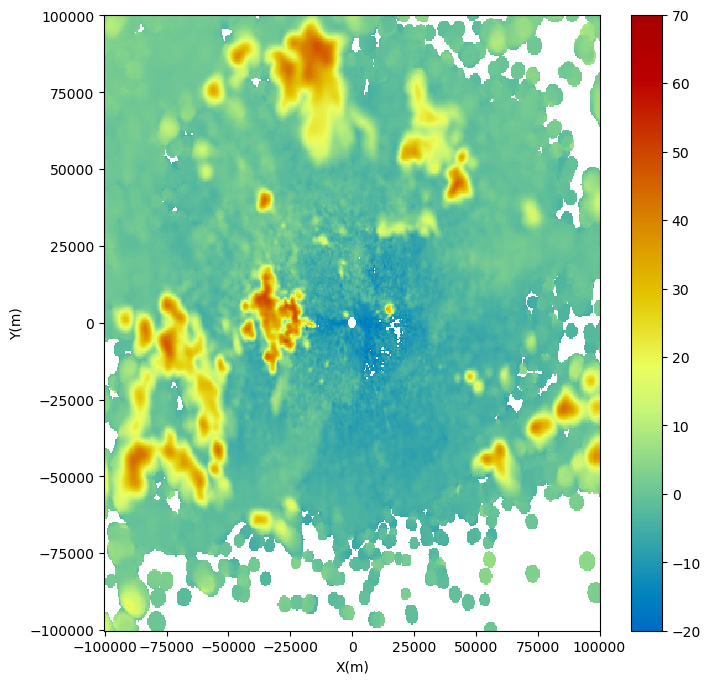

In [26]:
# In Py-ART's graphing suite, there is a display class similar to RadarMapDisplay,
# but for grids. To plot the grid:

[X,Y]=np.meshgrid(grids[0].x["data"],grids[0].y["data"])
lev=2 #Level of analysis
fig = plt.figure(figsize=(8,8))
plt.pcolormesh(X,Y,np.squeeze(Z[lev,:,:]),cmap='pyart_HomeyerRainbow',vmin=-20,vmax=70)
plt.xlabel('X(m)')
plt.ylabel('Y(m)')
plt.colorbar()
plt.savefig('Strat_Z_'+weight_func+'.png')



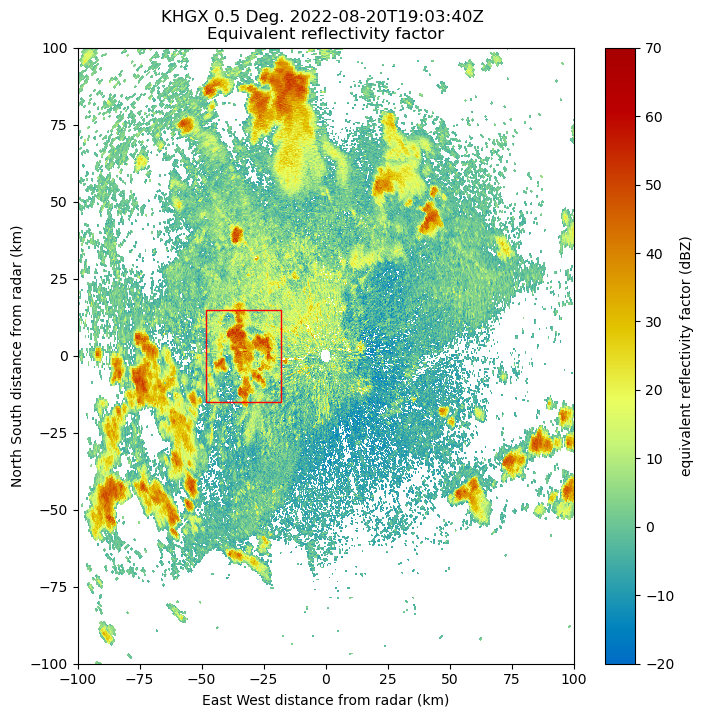

In [38]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pyart  # Assuming you have already imported pyart

fig = plt.figure(figsize=(8, 8))
display = pyart.graph.RadarDisplay(radars[0])
display.plot_ppi('reflectivity', sweep=0, vmin=-20, vmax=70)
display.set_limits(xlim=(-100, 100), ylim=(-100, 100))

# Define the rectangle dimensions
# Replace x, y, width, height with your specific values
x, y, width, height = -48, -15, 30, 30  # Example values
rect = patches.Rectangle((x, y), width, height, linewidth=1, edgecolor='r', facecolor='none')

# Add the rectangle to the plot
ax = plt.gca()  # Get current axes
ax.add_patch(rect)

# Uncomment the following line to save the figure
# plt.savefig('Raw_Z_with_box.png')

plt.show()


In [40]:
%store -r stats

In [41]:
stats

<xarray.Dataset>
Dimensions:                  (tracks: 54932, times: 100)
Coordinates:
  * tracks                   (tracks) int64 0 1 2 3 ... 345280 345281 345282
  * times                    (times) int64 0 1 2 3 4 5 6 ... 94 95 96 97 98 99
Data variables: (12/37)
    track_duration           (tracks) int32 11 2 4 6 3 2 2 32 ... 3 2 2 4 1 3 8
    base_time                (tracks, times) datetime64[ns] 2021-06-01T00:00:...
    meanlat                  (tracks, times) float32 29.12 29.13 ... nan nan
    meanlon                  (tracks, times) float32 -95.23 -95.25 ... nan nan
    area                     (tracks, times) float32 22.0 17.0 16.0 ... nan nan
    cloudnumber              (tracks, times) float64 1.0 2.0 4.0 ... nan nan nan
    ...                       ...
    start_split_tracknumber  (tracks) float64 nan nan nan ... 1.167e+04 nan nan
    start_split_timeindex    (tracks) float64 nan nan nan nan ... 16.0 nan nan
    start_split_cloudnumber  (tracks) float64 nan nan nan nan ... 1.0 nan nan
    end_merge_tracknumber    (tracks) float64 nan nan nan nan ... nan nan nan
    end_merge_timeindex      (tracks) float64 nan nan nan nan ... nan nan nan
    end_merge_cloudnumber    (tracks) float64 nan nan nan nan ... nan nan nan
Attributes:
    Title:                 Statistics of each track
    Institution:           Pacific Northwest National Laboratory
    Contact:               Zhe Feng, zhe.feng@pnnl.gov
    Created_on:            Sat Sep 16 01:48:11 2023
    startdate:             20210601.0000
    enddate:               20210831.2359
    timegap_hour:          0.25
    time_resolution_hour:  0.0833
    pixel_radius_km:       0.5

In [28]:
def cfad_calc(data_list, bins, lims, norm_opt=1):
    # Initialize combined histogram
    combined_hist2d = None
    
    # Calculate histogram for each dataset and combine them
    for data in data_list:
        # Initialize histogram for the current dataset
        hist2d = np.zeros((np.size(bins)-1, data.shape[0]))

        # Check if the user wants a limited domain
        limit_domain = np.size(lims) > 1
        if(limit_domain):
            [a, b] = np.where((X > lims[0])*(X < lims[1])*(Y > lims[2])*(Y < lims[3]))

        # Loop over all heights
        for lev in range(data.shape[0]):
            if limit_domain:
                data_hist = np.ma.compressed(data[lev, a, b])
            else:
                data_hist = np.ma.compressed(data[lev, :, :])

            # Calculate histogram for current dataset
            histogram, bin_edges = np.histogram(np.ravel(data_hist), bins)
            hist2d[:, lev] = histogram

        # Combine histograms from all datasets
        if combined_hist2d is None:
            combined_hist2d = hist2d
        else:
            combined_hist2d += hist2d

    # Normalize the combined histogram
    if norm_opt == 1:
        combined_hist2d = np.divide(combined_hist2d, np.sum(combined_hist2d, axis=0), where=np.sum(combined_hist2d, axis=0) != 0)
    elif norm_opt == 2:
        combined_hist2d /= np.max(combined_hist2d)

    bin_ctrs = (bins[:-1] + bins[1:]) / 2

    return combined_hist2d, bin_ctrs


def vert_stats(data_list, lims):
    combined_stats = None

    # Calculate statistics for each dataset and combine them
    for data in data_list:
        if np.size(lims) > 1:
            [a, b] = np.where((X > lims[0])*(X < lims[1])*(Y > lims[2])*(Y < lims[3])) 
            data_stats = np.ma.median(data[:, a, b], axis=1)
        else:
            data_stats = np.ma.mean(np.ma.mean(data, axis=2), axis=1)

        # Combine statistics from all datasets
        if combined_stats is None:
            combined_stats = data_stats
        else:
            combined_stats += data_stats

    # Average the combined statistics
    combined_stats /= len(data_list)

    return combined_stats



In [33]:
#CFAD X
data = [grid.fields['reflectivity']['data'] for grid in grids]
binsZ = np.arange(zlims[0], zlims[1], dz)

[hist_Z, Zctr] = cfad_calc(data,binsZ,lims,norm_opt)
#hist_Z /= dz
meanZ = vert_stats(data,lims)

#CFAD ZDR
data = [grid.fields['differential_reflectivity']['data'] for grid in grids] 
binsZDR = np.arange(zdrlims[0], zdrlims[1], dzdr)
[hist_ZDR, ZDRctr] = cfad_calc(data,binsZDR,lims,norm_opt)
#hist_ZDR /= (dzdr*10)
meanZDR = vert_stats(data,lims)

#CFAD rhohv
data = [grid.fields['cross_correlation_ratio']['data'] for grid in grids]
binsrho = np.arange(rholims[0], rholims[1], drho)
[hist_rho, rhoctr] = cfad_calc(data,binsrho,lims,norm_opt)
#hist_rho /= (drho*10000)
meanrho = vert_stats(data,lims)

#CFAD KDP
if(kdp_calc):
    data = [grid.fields['kdp']['data'] for grid in grids]
    binskdp = np.arange(kdplims[0], kdplims[1], dkdp)
    [hist_kdp,kdpctr] = cfad_calc(data,binskdp,lims,norm_opt)
    #hist_kdp /= (dkdp*100)
    meankdp = vert_stats(data,lims)

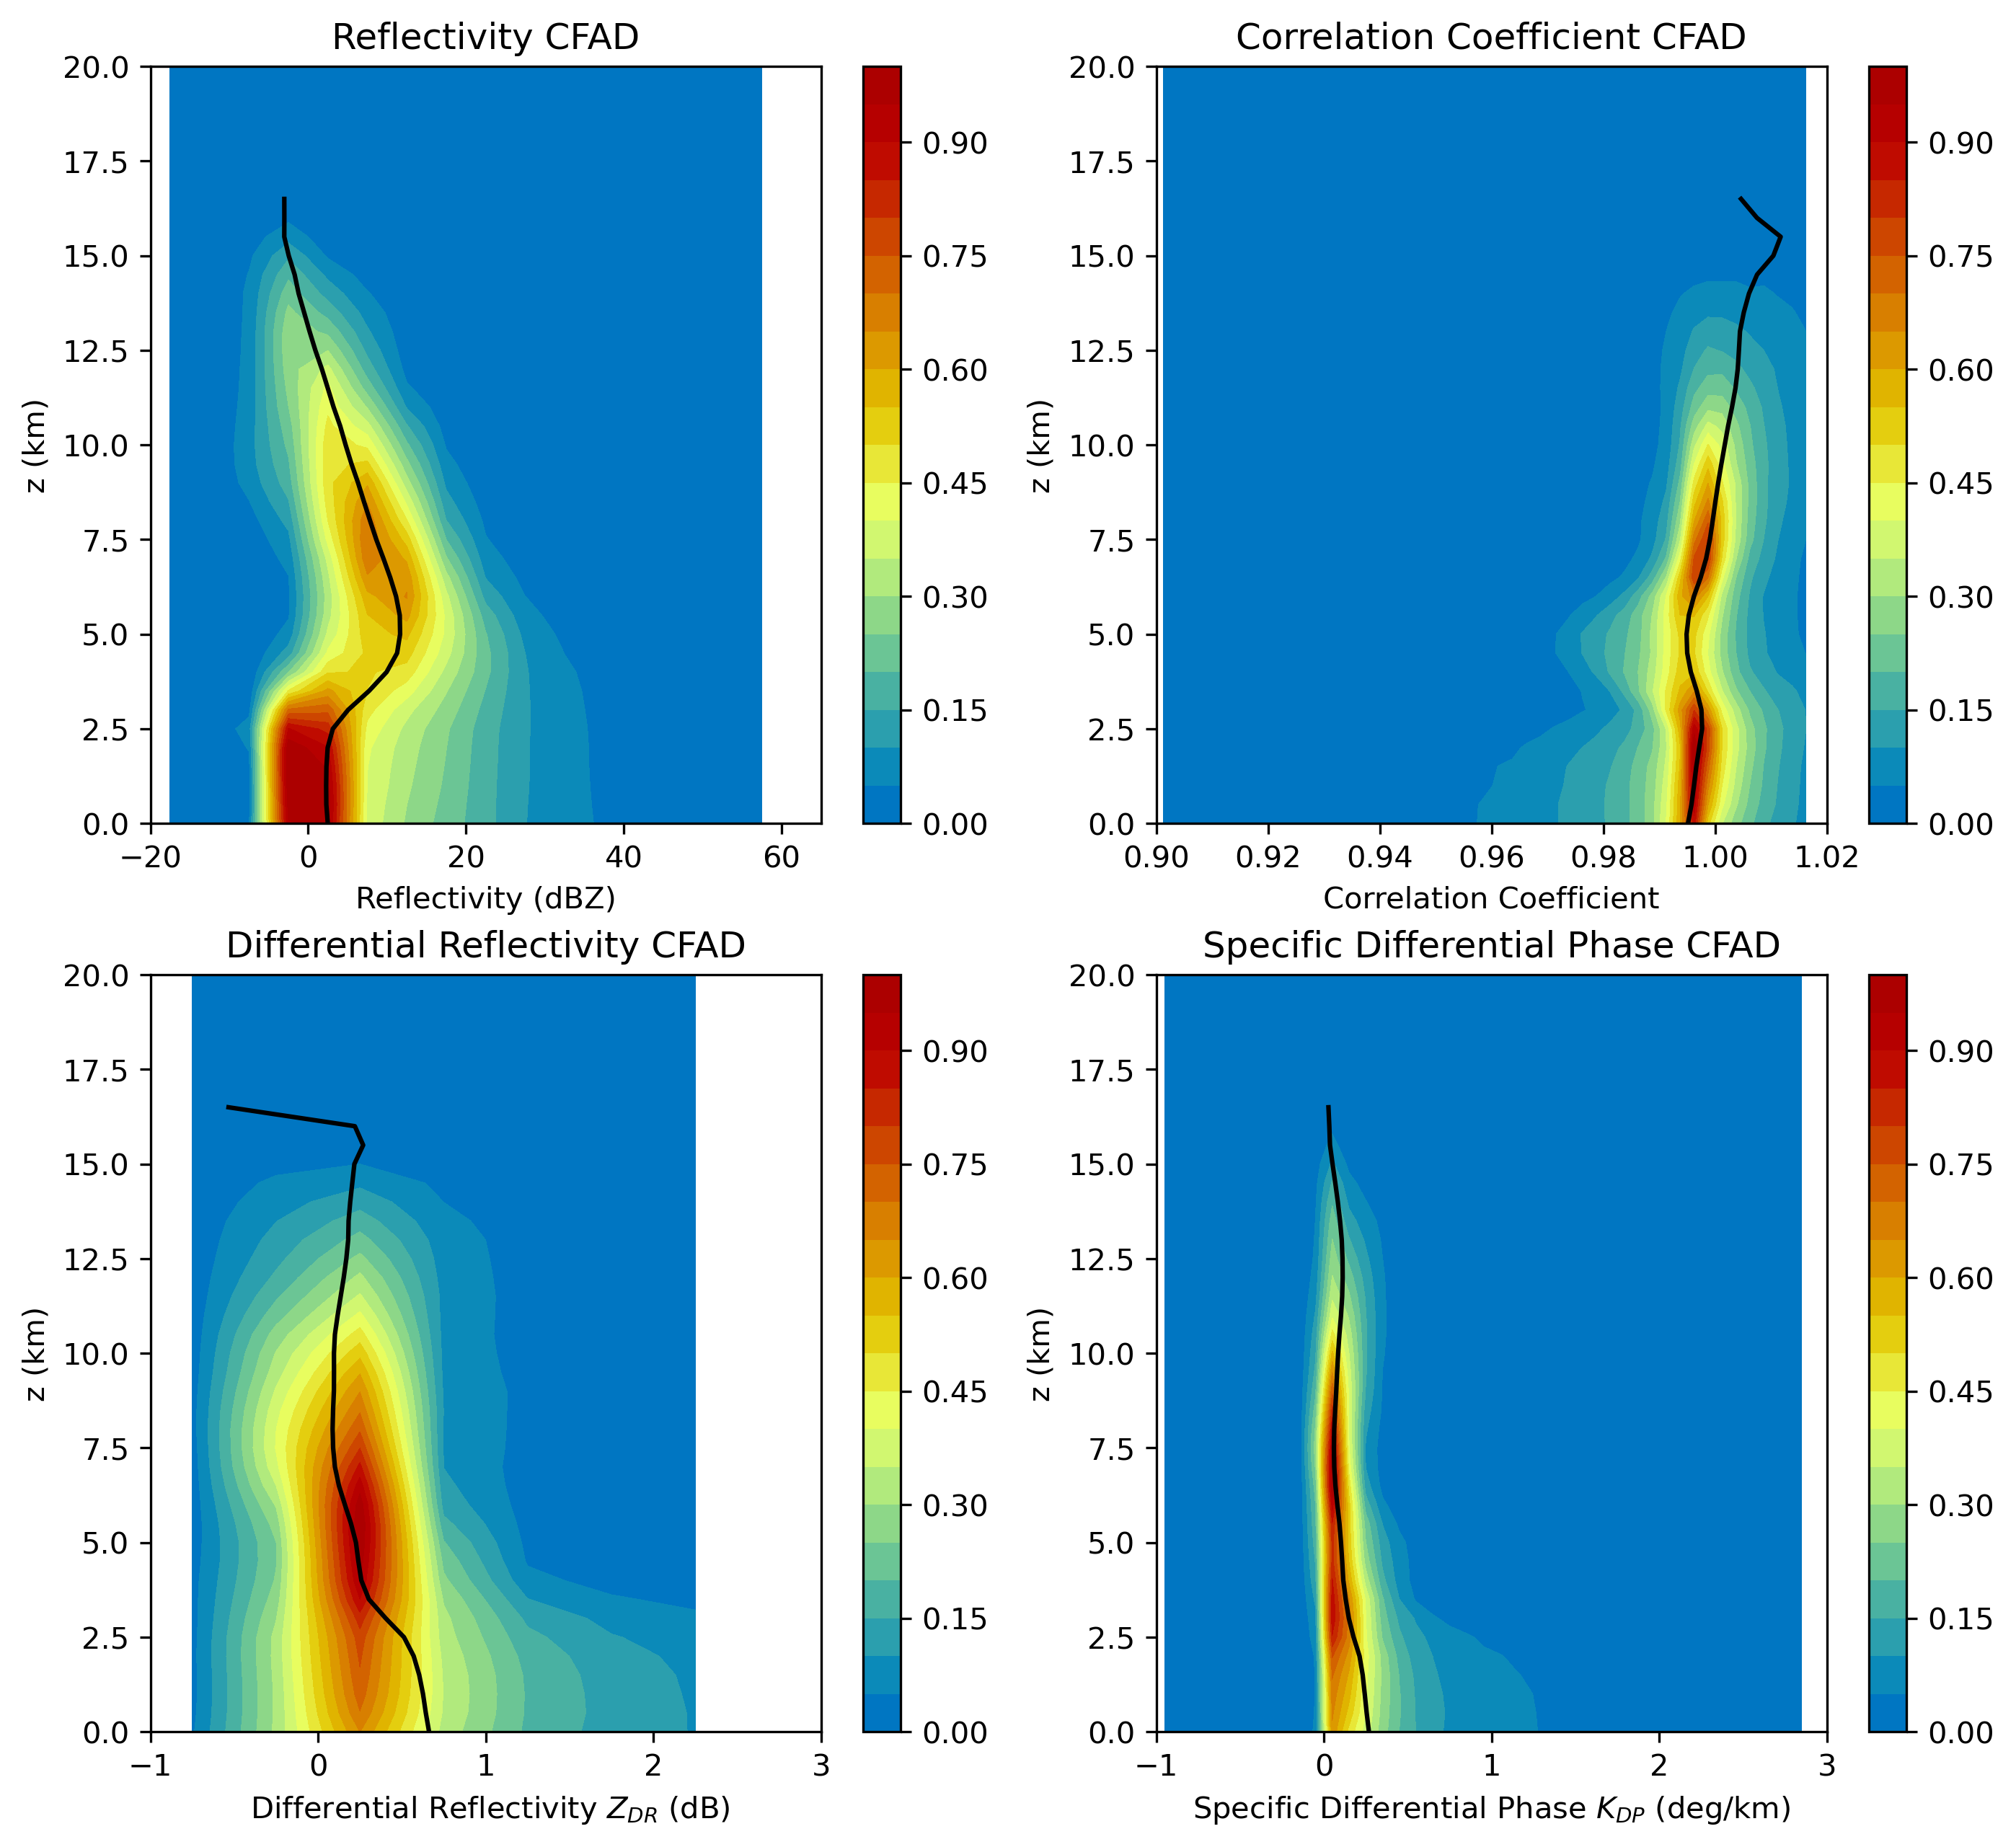

In [37]:
#Plotting levels for contours
ymax=20
fig,ax = plt.subplots(2,2,figsize=(11,10), dpi=300)
[z,b]=np.meshgrid(grid.z["data"],Zctr)
pcm=ax[0,0].contourf(b,z/1000,hist_Z,levels=20,cmap='pyart_HomeyerRainbow')
ax[0,0].plot(meanZ,grid.z["data"]/1000,'-k')
#ax[0,0].contour(b,z/1000,hist_Z,levels=np.arange(0.05,1,0.05),colors='k')
ax[0,0].set_xlabel('Reflectivity (dBZ)')
ax[0,0].set_ylabel('z (km)')
ax[0,0].set_title('Reflectivity CFAD')
#ax[0,0].set_title('Z CFAD (% of Data per dBZ per km)')
ax[0,0].set_xlim(zlims)
ax[0,0].set_ylim(0,ymax)
fig.colorbar(pcm, ax=ax[0,0])

[z,b]=np.meshgrid(grid.z["data"],ZDRctr)
pcm=ax[1,0].contourf(b,z/1000,hist_ZDR,levels=20,cmap='pyart_HomeyerRainbow')
#ax[1,0].contour(b,z/1000,hist_ZDR,levels=np.arange(0.05,0.5,0.05),colors='k')
ax[1,0].plot(meanZDR,grid.z["data"]/1000,'-k')
ax[1,0].set_xlabel(' Differential Reflectivity $Z_{DR}$ (dB)')
ax[1,0].set_ylabel('z (km)')
#ax[1,0].set_title('ZDR CFAD (% of Data per 0.1 dB per km)')
ax[1,0].set_title('Differential Reflectivity CFAD')
ax[1,0].set_xlim(zdrlims)
ax[1,0].set_ylim(0,ymax)
fig.colorbar(pcm, ax=ax[1,0])

[z,b]=np.meshgrid(grid.z["data"],rhoctr)
pcm=ax[0,1].contourf(b,z/1000,hist_rho,levels=20,cmap='pyart_HomeyerRainbow')
#ax[0,1].contour(b,z/1000,hist_rho,levels=np.arange(0.05,0.5,0.05),colors='k')
ax[0,1].plot(meanrho,grid.z["data"]/1000,'-k')
ax[0,1].set_xlabel('Correlation Coefficient')
ax[0,1].set_ylabel('z (km)')
#ax[0,1].set_title('Correlation Coefficient CFAD (% of Data per 0.001 CC per km)')
ax[0,1].set_title('Correlation Coefficient CFAD')
ax[0,1].set_xlim(rholims)
ax[0,1].set_ylim(0,ymax)
fig.colorbar(pcm, ax=ax[0,1])

if(kdp_calc):
    [z,b]=np.meshgrid(grid.z["data"],kdpctr)
    pcm=ax[1,1].contourf(b,z/1000,hist_kdp,levels=20,cmap='pyart_HomeyerRainbow')
    #ax[0,1].contour(b,z/1000,hist_rho,levels=np.arange(0.05,0.5,0.05),colors='k')
    ax[1,1].plot(meankdp,grid.z["data"]/1000,'-k')
    ax[1,1].set_xlabel('Specific Differential Phase $K_{DP}$ (deg/km)')
    #ax[1,1].set_title('KDP CFAD (% of Data per 0.01 deg/km per km)')
    ax[1,1].set_title('Specific Differential Phase CFAD')
    ax[1,1].set_ylabel('z (km)')
    ax[1,1].set_ylim(0,ymax)
    ax[1,1].set_xlim(kdplims)
    fig.colorbar(pcm, ax=ax[1,1])

fig.savefig('CFAD_norm.png')



In [35]:
origin_upwind =
terminate_upwind =  

SyntaxError: invalid syntax (1275707442.py, line 1)